In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
cifar10 = keras.datasets.cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [6]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(40000, 32, 32, 3) (40000, 1)
(10000, 32, 32, 3) (10000, 1)
(10000, 32, 32, 3) (10000, 1)


In [25]:
class_names = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']
print(class_names[y_train[:36][0][0]])

frog


In [28]:
# 显示图片
def show_images(n_row, n_col, x_data, y_data, class_names):
    assert len(x_data) == len(y_data), "the length must be the same"
    fig, axes = plt.subplots(n_row, n_col, figsize=(15, 15))
    for i in range(n_row):
        for j in range(n_col):
            index = i*n_col + j
            axes[i, j].imshow(x_data[index], cmap="binary", interpolation="nearest")
            axes[i, j].set_title(class_names[y_data[index][0]])
    
    plt.show()

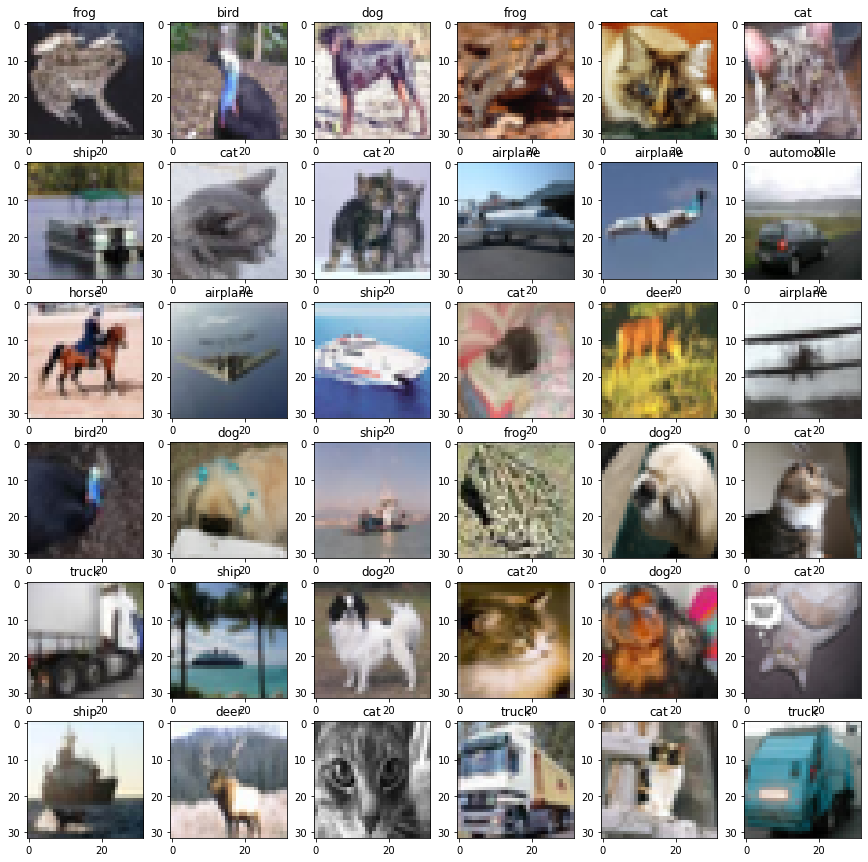

In [29]:
show_images(6, 6, x_train[:36], y_train[:36], class_names)

In [8]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='selu', padding="same", input_shape=x_train.shape[1:]),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='selu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
      
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='selu', padding="same"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='selu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='selu', padding="same"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='selu', padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="selu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

In [10]:
history = model.fit(x_train, y_train, batch_size=32, callbacks=callbacks, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
1250/1250 [==============================] - 1352s 1s/step - loss: 4.4880 - accuracy: 0.2140 - val_loss: 1.8327 - val_accuracy: 0.3093
Epoch 2/5
1250/1250 [==============================] - 1320s 1s/step - loss: 1.6430 - accuracy: 0.3914 - val_loss: 1.5043 - val_accuracy: 0.4401
Epoch 3/5
1250/1250 [==============================] - 1331s 1s/step - loss: 1.3903 - accuracy: 0.4942 - val_loss: 1.1963 - val_accuracy: 0.5643
Epoch 4/5
1250/1250 [==============================] - 1333s 1s/step - loss: 2.5975 - accuracy: 0.4567 - val_loss: 2.3486 - val_accuracy: 0.0933
Epoch 5/5
 251/1250 [=====>........................] - ETA: 16:12 - loss: 2.3639 - accuracy: 0.0940

KeyboardInterrupt: 